In [1]:
%reset -f
import h5py
import time as t
import numpy as np
import scipy as sp
import scipy.io as spi
import tensorflow as tf
import matplotlib.pyplot as plt

(1000, 100) (1000, 100, 100)
(1000, 100, 100, 1) (1000, 100, 100)


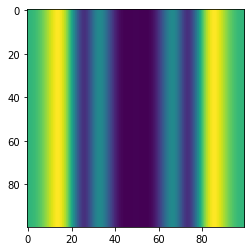

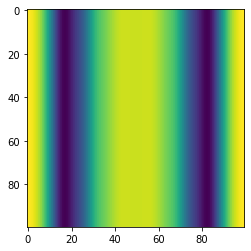

In [2]:
with tf.device('/device:gpu:0'):   

    data_train = spi.loadmat('ADVD_TRAIN_DATA_CNN.mat')

    u = data_train['force']
    s = data_train['sol']
    print(u.shape, s.shape)

    u = np.tile(u,100)
    u = u.reshape((1000,100,100))[..., np.newaxis]
    print(u.shape, s.shape)

    plt.imshow(u[0,:,:])
    plt.show()

    plt.imshow(u[1,:,:])
    plt.show()

    u[2,:,:]

In [3]:
# minu = np.min(u)
# maxu = np.max(u)

# u = (u-minu)/(maxu-minu)

In [4]:
from tensorflow.keras.models import Model
with tf.device('/device:gpu:0'):   

    inputs = tf.keras.layers.Input(shape = (100,100,1), name = 'inputs')
    hidden = tf.keras.layers.ZeroPadding2D((2,2))(inputs)
    hidden = tf.keras.layers.Conv2D(48,7,2)(hidden)





    hidden1 = tf.keras.layers.ZeroPadding2D((1,1))(hidden)
    hidden1 = tf.keras.layers.BatchNormalization()(hidden1)
    hidden1 = tf.keras.layers.ReLU()(hidden1)
    hidden1 = tf.keras.layers.Conv2D(16,3,1)(hidden1)

    hidden2 = tf.keras.layers.ZeroPadding2D((1,1))(tf.concat((hidden,hidden1),3))
    hidden2 = tf.keras.layers.BatchNormalization()(hidden2)
    hidden2 = tf.keras.layers.ReLU()(hidden2)
    hidden2 = tf.keras.layers.Conv2D(16,3,1)(hidden2)

    hidden3 = tf.keras.layers.ZeroPadding2D((1,1))(tf.concat((hidden,hidden1,hidden2),3))
    hidden3 = tf.keras.layers.BatchNormalization()(hidden3)
    hidden3 = tf.keras.layers.ReLU()(hidden3)
    hidden3 = tf.keras.layers.Conv2D(16,3,1)(hidden3)





    hidden4 = tf.keras.layers.BatchNormalization()(tf.concat((hidden,hidden1,hidden2,hidden3),3))
    hidden4 = tf.keras.layers.ReLU()(hidden4)
    hidden4 = tf.keras.layers.Conv2D(48,1,1)(hidden4)

    hidden5 = tf.keras.layers.ZeroPadding2D((1,1))(hidden4)
    hidden5 = tf.keras.layers.BatchNormalization()(hidden5)
    hidden5 = tf.keras.layers.ReLU()(hidden5)
    hidden5 = tf.keras.layers.Conv2D(48,3,2)(hidden5)





    hidden6 = tf.keras.layers.ZeroPadding2D((1,1))(hidden5)
    hidden6 = tf.keras.layers.BatchNormalization()(hidden6)
    hidden6 = tf.keras.layers.ReLU()(hidden6)
    hidden6 = tf.keras.layers.Conv2D(16,3,1)(hidden6)

    hidden7 = tf.keras.layers.ZeroPadding2D((1,1))(tf.concat((hidden5,hidden6),3))
    hidden7 = tf.keras.layers.BatchNormalization()(hidden7)
    hidden7 = tf.keras.layers.ReLU()(hidden7)
    hidden7 = tf.keras.layers.Conv2D(16,3,1)(hidden7)

    hidden8 = tf.keras.layers.ZeroPadding2D((1,1))(tf.concat((hidden5,hidden6,hidden7),3))
    hidden8 = tf.keras.layers.BatchNormalization()(hidden8)
    hidden8 = tf.keras.layers.ReLU()(hidden8)
    hidden8 = tf.keras.layers.Conv2D(16,3,1)(hidden8)

    hidden9 = tf.keras.layers.ZeroPadding2D((1,1))(tf.concat((hidden5,hidden6,hidden7,hidden8),3))
    hidden9 = tf.keras.layers.BatchNormalization()(hidden9)
    hidden9 = tf.keras.layers.ReLU()(hidden9)
    hidden9 = tf.keras.layers.Conv2D(16,3,1)(hidden9)

    hidden10 = tf.keras.layers.ZeroPadding2D((1,1))(tf.concat((hidden5,hidden6,hidden7,hidden8,hidden9),3))
    hidden10 = tf.keras.layers.BatchNormalization()(hidden10)
    hidden10 = tf.keras.layers.ReLU()(hidden10)
    hidden10 = tf.keras.layers.Conv2D(16,3,1)(hidden10)

    hidden11 = tf.keras.layers.ZeroPadding2D((1,1))(tf.concat((hidden5,hidden6,hidden7,hidden8,hidden9,hidden10),3))
    hidden11 = tf.keras.layers.BatchNormalization()(hidden11)
    hidden11 = tf.keras.layers.ReLU()(hidden11)
    hidden11 = tf.keras.layers.Conv2D(16,3,1)(hidden11)




    hidden12 = tf.keras.layers.BatchNormalization()(tf.concat((hidden5,hidden6,hidden7,hidden8,hidden9,hidden10,hidden11),3))
    hidden12 = tf.keras.layers.ReLU()(hidden12)
    hidden12 = tf.keras.layers.Conv2D(72,1,1)(hidden12)

    hidden13 = tf.keras.layers.BatchNormalization()(hidden12)
    hidden13 = tf.keras.layers.ReLU()(hidden13)
    hidden13 = tf.keras.layers.Conv2DTranspose(72,3,2,padding='same',output_padding=1)(hidden13)





    hidden14 = tf.keras.layers.ZeroPadding2D((1,1))(hidden13)
    hidden14 = tf.keras.layers.BatchNormalization()(hidden14)
    hidden14 = tf.keras.layers.ReLU()(hidden14)
    hidden14 = tf.keras.layers.Conv2D(16,3,1)(hidden14)

    hidden15 = tf.keras.layers.ZeroPadding2D((1,1))(tf.concat((hidden13,hidden14),3))
    hidden15 = tf.keras.layers.BatchNormalization()(hidden15)
    hidden15 = tf.keras.layers.ReLU()(hidden15)
    hidden15 = tf.keras.layers.Conv2D(16,3,1)(hidden15)

    hidden16 = tf.keras.layers.ZeroPadding2D((1,1))(tf.concat((hidden13,hidden14,hidden15),3))
    hidden16 = tf.keras.layers.BatchNormalization()(hidden16)
    hidden16 = tf.keras.layers.ReLU()(hidden16)
    hidden16 = tf.keras.layers.Conv2D(16,3,1)(hidden16)






    hidden17 = tf.keras.layers.BatchNormalization()(tf.concat((hidden13,hidden14,hidden15,hidden16),3))
    hidden17 = tf.keras.layers.ReLU()(hidden17)
    hidden17 = tf.keras.layers.Conv2D(60,2,1)(hidden17)

    hidden18 = tf.keras.layers.BatchNormalization()(hidden17)
    hidden18 = tf.keras.layers.ReLU()(hidden18)
    hidden18 = tf.keras.layers.Conv2DTranspose(30,3,2,output_padding=1)(hidden18)

    hidden19 = tf.keras.layers.BatchNormalization()(hidden18)
    hidden19 = tf.keras.layers.ReLU()(hidden19)
    output = tf.keras.layers.Conv2DTranspose(1,1,1)(hidden19)


    model = Model(inputs = inputs, outputs = output)    
    model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 104, 104, 1)  0          ['inputs[0][0]']                 
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 48)   2400        ['zero_padding2d[0][0]']         
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 51, 51, 48)  0           ['conv2d[0][0]']             

In [5]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model, dpi = 60, show_layer_activations = True).create(prog='dot', format='svg'))

In [6]:
# physical_devices = tf.config.list_physical_devices('GPU')
# print("Num GPUs:", len(physical_devices))

In [7]:
bs = 50

with tf.device('/device:gpu:0'):   

    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath = './ChkPts/CIV_DED_S7/',
        save_weights_only=True,
        monitor='loss',
        mode='min',
        save_best_only=True)

    model.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = 'mae')
    for i in range(0,100):
        print('iteration = '+str(i))
        model.fit(u, s, epochs = 1, verbose = 1, batch_size = bs, callbacks = [model_checkpoint_callback])
        for j in range(0,24):
            model.fit(u, s, epochs = 1, verbose = 0, batch_size = bs, callbacks = [model_checkpoint_callback])
            
model.load_weights('./ChkPts/CIV_DED_S7/')

iteration = 0
20/20 [==============================] - 7s 76ms/step - loss: 0.4909 - mae: 0.5112
iteration = 1
20/20 [==============================] - 1s 71ms/step - loss: 0.0518 - mae: 0.1628
iteration = 2
20/20 [==============================] - 1s 75ms/step - loss: 0.0287 - mae: 0.1168
iteration = 3
20/20 [==============================] - 1s 71ms/step - loss: 0.0250 - mae: 0.1117
iteration = 4
20/20 [==============================] - 1s 75ms/step - loss: 0.0175 - mae: 0.0828
iteration = 5
20/20 [==============================] - 1s 71ms/step - loss: 0.0158 - mae: 0.0750
iteration = 6
20/20 [==============================] - 1s 71ms/step - loss: 0.0149 - mae: 0.0716
iteration = 7
20/20 [==============================] - 1s 71ms/step - loss: 0.0146 - mae: 0.0704
iteration = 8
20/20 [==============================] - 1s 71ms/step - loss: 0.0134 - mae: 0.0648
iteration = 9
20/20 [==============================] - 1s 72ms/step - loss: 0.0141 - mae: 0.0676
iteration = 10
20/20 [========

In [8]:
with tf.device('/device:gpu:0'):   

    import pickle

    filename = 'CNN_DED_model_s7.sav'

    pickle.dump(model, open(filename, 'wb'))
    # model = pickle.load(open(filename, 'rb'))

INFO:tensorflow:Assets written to: ram://73873e9b-d91f-4647-a586-af690ef5c0bb/assets


In [9]:
with tf.device('/device:gpu:0'):   

    data_train = spi.loadmat('ADVD_TEST_DATA_CNN.mat')

    u = data_train['force']
    s = data_train['sol']

    u = np.tile(u,100)
    u = u.reshape((10000,100,100))[..., np.newaxis]

    print(u.shape, s.shape)

(10000, 100, 100, 1) (10000, 100, 100)


In [10]:
with tf.device('/device:gpu:0'):   

    pred = np.zeros([10000,100,100])
    ptr = np.zeros([10000,2])

    for i in range(0,100):
        print(i)
        pred[i*100:(i+1)*100,:,:] = np.squeeze(model(u[i*100:(i+1)*100,:,:,:]))

        # string = 'pred_'+str(i)+'.mat'
        # spi.savemat(string,{'DED_pred':pred[i*100:(i+1)*100,:,:]})

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [11]:
with tf.device('/device:gpu:0'):   

    data = spi.loadmat('test_PDE_ADVD.mat')

    xt = data['X_test1']
    sol = data['y_test']

    # sol.shape, xt.shape

In [12]:
# ptr = np.zeros([1000000,2])
# for i in range(0,2):
#     for j in range(0,1000000):
#         ptr[j,i] = np.where(np.isclose(np.linspace(0,1,100),xt[j,i], rtol=1e-05))[0]

In [13]:
with tf.device('/device:gpu:0'):   

    # spi.savemat('save_ptr',{'ptr':ptr})
    ptr = spi.loadmat('save_ptr')['ptr']

    # ptr, xt

In [14]:
with tf.device('/device:gpu:0'):   

    solve_eval = np.zeros([1000000,1])

    for i in range(0,10000):
        for j in range(0,100):
            solve_eval[i*100+j,0] = pred[i,int(ptr[i*100+j,0]),int(ptr[i*100+j,1])]

    # s.shape, solve_eval.shape, sol.shape, solve_eval-sol

In [15]:
with tf.device('/device:gpu:0'):   

    print(np.mean((solve_eval-sol)**2)/np.mean((sol)**2))

0.020112401038850414


In [16]:
with tf.device('/device:gpu:0'):   

    print(np.mean((pred-s)**2)/np.mean((s)**2))

0.019908451329498193
